In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from IPython.display import Markdown, display
from dotenv import load_dotenv
import os

In [11]:
load_dotenv()

True

In [12]:
class player_state(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    average: float
    player_stat: str

In [ ]:
def calculate_strike_rate(state: player_state):
    """calculate strike rate from runs and balls"""

    strike_rate = (state["runs"] / state["balls"]) * 100 if state["balls"] > 0 else 0
    return  {"strike_rate": strike_rate}

def calculate_balls_per_boundary(state: player_state):
    """calculate balls per boundary from balls, fours and sixes"""

    balls_per_boundary = state["balls"] / (state["fours"] + state["sixes"]) if (state["fours"] + state["sixes"]) > 0 else 0
    return {"balls_per_boundary": balls_per_boundary}

def calculate_boundary_percentage(state: player_state):
    """calculate boundary percentage from fours and sixes"""

    total_boundaries = state["fours"] + state["sixes"]
    boundary_percentage = (total_boundaries / state["balls"]) * 100 if state["balls"] > 0 else 0
    return {"boundary_percentage": boundary_percentage}

def calculate_average(state: player_state):
    """calculate batting average from runs and balls faced"""
    if state["balls"] == 0:
        return {"average": 0}
    average = state["runs"] / (state["balls"] / 6) if state["balls"] > 0 else 0
    return {"average": average} 

def display_player_stats(state: player_state):
    """display player statistics in Markdown format"""
    stats = f"""
    Player Statistics:
    Runs: {state['runs']}
    Balls: {state['balls']}
    Fours: {state['fours']}
    Sixes: {state['sixes']}
    Strike Rate: {state['strike_rate']:.2f}
    Balls per Boundary: {state['balls_per_boundary']:.2f}
    Boundary Percentage: {state['boundary_percentage']:.2f}%
    Average: {state['average']:.2f}
    """
    display(Markdown(stats))
    return {"player_stat": stats}


In [14]:
graph = StateGraph(player_state)

# Define the nodes in the graph 
graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("calculate_average", calculate_average)
graph.add_node("display_player_stats", display_player_stats)

# Define the edges in the graph 
graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_balls_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")
graph.add_edge(START, "calculate_average")

graph.add_edge("calculate_strike_rate", "display_player_stats")
graph.add_edge("calculate_balls_per_boundary", "display_player_stats")
graph.add_edge("calculate_boundary_percentage", "display_player_stats")
graph.add_edge("calculate_average", "display_player_stats")
graph.add_edge("display_player_stats", END)


In [15]:
workflow = graph.compile()

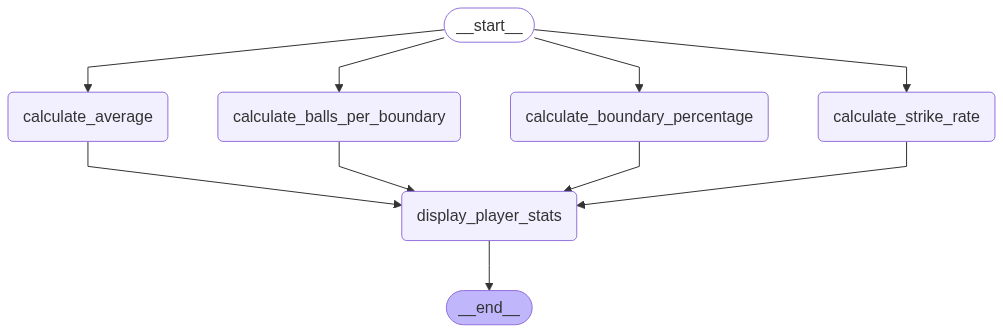

In [16]:
workflow

In [17]:
input_state = player_state(
    runs=100,
    balls=50,
    fours=10,
    sixes=5,
    strike_rate=0.0,
    balls_per_boundary=0.0,
    boundary_percentage=0.0,
    average=0.0,
    player_stat=" ")

In [18]:
display(Markdown(f"Input state: {input_state}"))
output_state = workflow.invoke(input_state)  
display(Markdown(f"Output state: {output_state}"))

Input state: {'runs': 100, 'balls': 50, 'fours': 10, 'sixes': 5, 'strike_rate': 0.0, 'balls_per_boundary': 0.0, 'boundary_percentage': 0.0, 'average': 0.0, 'player_stat': ' '}


    Player Statistics:
    - Runs: 100
    - Balls: 50
    - Fours: 10
    - Sixes: 5
    - Strike Rate: 200.00
    - Balls per Boundary: 3.33
    - Boundary Percentage: 30.00%
    - Average: 12.00
    

Output state: {'runs': 100, 'balls': 50, 'fours': 10, 'sixes': 5, 'strike_rate': 200.0, 'balls_per_boundary': 3.3333333333333335, 'boundary_percentage': 30.0, 'average': 12.0, 'player_stat': '\n    Player Statistics:\n    - Runs: 100\n    - Balls: 50\n    - Fours: 10\n    - Sixes: 5\n    - Strike Rate: 200.00\n    - Balls per Boundary: 3.33\n    - Boundary Percentage: 30.00%\n    - Average: 12.00\n    '}

In [21]:
output_state

{'runs': 100,
 'balls': 50,
 'fours': 10,
 'sixes': 5,
 'strike_rate': 200.0,
 'balls_per_boundary': 3.3333333333333335,
 'boundary_percentage': 30.0,
 'average': 12.0,
 'player_stat': '\n    Player Statistics:\n    - Runs: 100\n    - Balls: 50\n    - Fours: 10\n    - Sixes: 5\n    - Strike Rate: 200.00\n    - Balls per Boundary: 3.33\n    - Boundary Percentage: 30.00%\n    - Average: 12.00\n    '}